# 二维向量


## 二维向量的表示

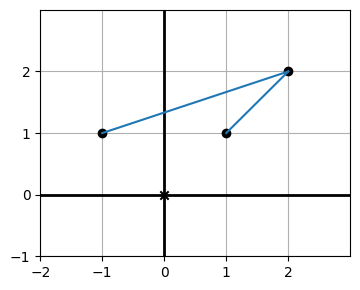

In [1]:
from vector_drawing import *

dino_vectors = [(1, 1), (2, 2), (-1, 1)]

draw(
    Points(*dino_vectors),
    Segment(dino_vectors[0], dino_vectors[1]),
    Segment(dino_vectors[1], dino_vectors[2]),
)

通过二维向量绘制一个 `sin` 函数的图像

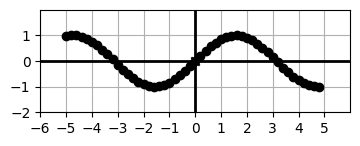

In [2]:
import math
import numpy as np

sin_dots = [(x, math.sin(x)) for x in np.arange(-5, 5, 0.2)]

draw(
    Points(*sin_dots)
)

## 向量的计算

### 向量的加法

In [3]:
def bivec_add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

创建两个向量，然后将它们相加

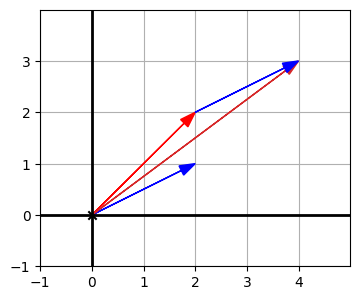

In [4]:
v1 = (2, 2)
v2 = (2, 1)

draw(
    Arrow(v1, (0, 0), color='red'),
    Arrow(v2, (0, 0), color='blue'),
    Arrow(bivec_add(v1, v2), (0, 0)),
    Arrow(bivec_add(v1, v2), v1, color='blue'),
)

### 向量的减法

In [5]:
def bivec_subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

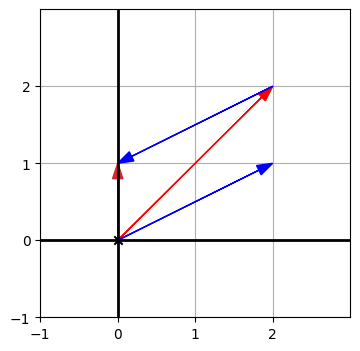

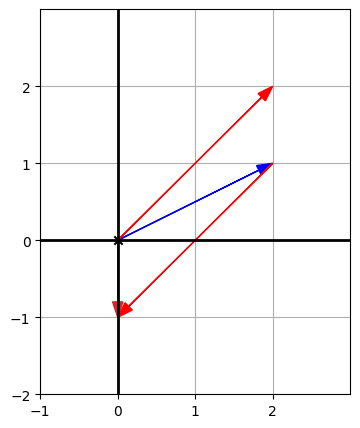

In [6]:
draw(
    Arrow(v1, (0, 0), color='red'),
    Arrow(v2, (0, 0), color='blue'),
    Arrow(bivec_subtract(v1, v2), (0, 0)),
    Arrow(bivec_subtract(v1, v2), v1, color='blue'),
)

draw(
    Arrow(v2, (0, 0), color='blue'),
    Arrow(v1, (0, 0), color='red'),
    Arrow(bivec_subtract(v2, v1), (0, 0)),
    Arrow(bivec_subtract(v2, v1), v2, color='red'),
)

### 向量的数乘

In [7]:
def bivec_scalar_multiply(c, v):
    return (c * v[0], c * v[1])

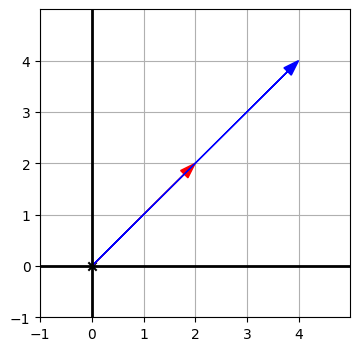

向量 v1: (2, 2) 乘以 2 为：(4, 4)


In [8]:
multiply_vector = bivec_scalar_multiply(2, v1)

draw(
    Arrow(v1, (0, 0), color='red'),
    Arrow(multiply_vector, (0, 0), color='blue'),
)

print(f'向量 v1: {v1} 乘以 2 为：{multiply_vector}')

### 向量取反

In [9]:
def bivec_negate(v):
    return (-v[0], -v[1])

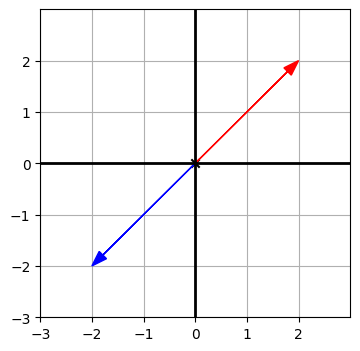

向量 v1 取反为：(-2, -2)


In [10]:
negate_vector = bivec_negate(v1)

draw(
    Arrow(v1, (0, 0), color='red'),
    Arrow(negate_vector, (0, 0), color='blue'),
)

print(f'向量 v1 取反为：{negate_vector}')

### 向量长度计算

In [11]:
def bivec_length(v):
    return math.sqrt(v[0] ** 2 + v[1] ** 2)

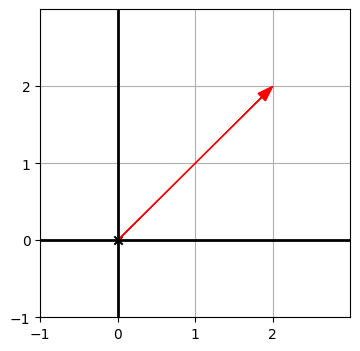

向量 v1 的长度为：2.8284271247461903


In [12]:
draw(
    Arrow(v1, (0, 0), color='red'),
)

print(f'向量 v1 的长度为：{bivec_length(v1)}')

## 极坐标与笛卡尔坐标

极坐标使用一个长度和一个角度来表示一个向量，而笛卡尔坐标使用两个长度来表示一个向量。

极坐标的角度是相对于 x 轴的逆时针角度，角度的范围是 0 到 2π。

笛卡尔坐标的 x 和 y 分别是向量在 x 轴和 y 轴上的投影长度。

### 极坐标转笛卡尔坐标

极坐标转笛卡尔坐标的公式如下：

$$
(x, y) = (r \cos(\theta), r \sin(\theta))
$$

其中，$r$ 是向量的长度，$\theta$ 是向量的角度。

- 通过 $r \cos(\theta)$ 可以得出在角度 $\theta$ 中一个单位长度在 `x` 轴上的投影长度比例。
- 通过 $r \sin(\theta)$ 可以得出在角度 $\theta$ 中一个单位长度在 `y` 轴上的投影长度比例。

最后，将这两个比例乘以向量的长度 $r$，就可以得出向量在笛卡尔坐标系中的坐标。


In [13]:
def polar_to_cartesian(p):
    r, theta = p
    return r * math.cos(theta), r * math.sin(theta)

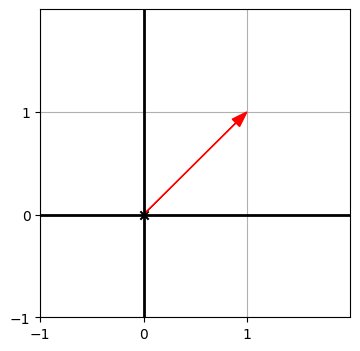

极坐标 (1.4142135623730951, 0.7853981633974483) 转换为笛卡尔坐标为：(1.0000000000000002, 1.0000000000000002)


In [14]:
polar_vector = (math.sqrt(2), math.pi / 4)

draw(
    Arrow(polar_to_cartesian(polar_vector), (0, 0), color='red'),
)

print(f'极坐标 {polar_vector} 转换为笛卡尔坐标为：{polar_to_cartesian(polar_vector)}')

### 笛卡尔坐标转极坐标



在转换坐标系之前需要新增两个可以在弧度制和角度制之间转换的函数。

In [15]:
def to_degrees(theta):
    """
    弧度转角度
    :param theta: 弧度
    :return: 角度
    """
    return theta * 180 / math.pi


def to_radians(theta):
    """
    角度转弧度
    :param theta: 角度
    :return: 弧度
    """
    return theta * math.pi / 180

In [16]:
print(f'角度 0° 转换为 0 到 2π 之间的角度为：{to_radians(0)}')
print(f'角度 90° 转换为 0 到 2π 之间的角度为：{to_radians(90)}')
print(f'角度 180° 转换为 0 到 2π 之间的角度为：{to_radians(180)}')

print(f'弧度 0 转换为 0° 到 360° 之间的角度为：{to_degrees(0)}')
print(f'弧度 π/2 转换为 0° 到 360° 之间的角度为：{to_degrees(math.pi / 2)}')
print(f'弧度 π 转换为 0° 到 360° 之间的角度为：{to_degrees(math.pi)}')

角度 0° 转换为 0 到 2π 之间的角度为：0.0
角度 90° 转换为 0 到 2π 之间的角度为：1.5707963267948966
角度 180° 转换为 0 到 2π 之间的角度为：3.141592653589793
弧度 0 转换为 0° 到 360° 之间的角度为：0.0
弧度 π/2 转换为 0° 到 360° 之间的角度为：90.0
弧度 π 转换为 0° 到 360° 之间的角度为：180.0


In [17]:
cartesian_value = (1, 3)

可以通过下面的勾股定理公式得出笛卡尔坐标转极坐标的第一个值（长度）：

$$
r = \sqrt{x^2 + y^2}
$$

通过 $sin(\theta)$ 函数可以通过 $\theta$ 得出斜边与 $y$ 轴上的投影长度比例，现在已知 $sin(\theta)$ 的值，可以通过反向求出 $\theta$ 的值：

$$
\theta = \arcsin(\frac{y}{r})
$$

In [18]:
hypotenuse = math.sqrt(cartesian_value[0] ** 2 + cartesian_value[1] ** 2)
sin_value = math.sin(cartesian_value[1] / hypotenuse)
print(f'斜边与 y 轴上的投影长度比例为：{sin_value}')

theta = math.asin(sin_value)
print(f'通过反向求出 theta 的弧度值为：{theta}')
print(f'通过反向求出 theta 的角度值为：{to_degrees(theta)}')

斜边与 y 轴上的投影长度比例为：0.8126488966420368
通过反向求出 theta 的弧度值为：0.9486832980505138
通过反向求出 theta 的角度值为：54.355549072845996


通过上面的代码可以得出笛卡尔坐标转极坐标的第二个值（角度），但是另一个基于 $y$ 轴的对称角度的 $sin$ 的值和当前角度的 $sin$ 也是一样的。

In [19]:
print(f'计算出当前角度基于 y 轴对称的另一个角度为：{math.pi - theta}')
print(f'计算对称角的 sin 值：{math.sin(math.pi - theta)}')

计算出当前角度基于 y 轴对称的另一个角度为：2.192909355539279
计算对称角的 sin 值：0.812648896642037


同样的，使用 $cos$ 的反向函数 $arccos$ 得出的值，也会在 $x$ 轴上有一个对称的值。

In [20]:
print(f'（25°）计算一个指定角的 cos 值：{math.cos(math.pi / 4)}')
print(f'（335°）计算基于 x 轴对称角度的 cos 值：{math.cos(2 * math.pi - math.pi / 4)}')

（25°）计算一个指定角的 cos 值：0.7071067811865476
（335°）计算基于 x 轴对称角度的 cos 值：0.7071067811865474


在使用 $asin(y / r)$ 函数时，会丢失 $x$ 轴上的正负号，所以无法得出正确的角度值。

在使用 $acos(x / r)$ 函数时，会丢失 $y$ 轴上的正负号，所以无法得出正确的角度值。

所以，如果需要计算笛卡尔坐标系转为极坐标系的角度，需要使用到 $tan$ 函数的反向函数 $arctan$。

$$
\theta = \arctan(\frac{y}{x})
$$

此时，可以得到 $x$ 轴和 $y$ 轴上的正负号，确保不会丢失任何轴的象限信息。

在 `Python` 中，不可以直接使用 `math.atan(y / x)` 函数，因为这样会先计算 `y` 和 `x` 的比值导致 `atan` 丢失正负号，需要使用一个特定的 `math.atan2(y, x)` 函数进行计算。

In [21]:
print(f'(1, 1) atan  计算角度：{to_degrees(math.atan(1 / 1))}')
print(f'(1, 1) atan2 计算角度：{to_degrees(math.atan2(1, 1))}')

# 此时计算得出的角度值是错误的
print(f'(-1, 1) atan  计算角度：{to_degrees(math.atan(1 / -1))}')
# 使用 atan2 第一个参数是 y，第二个参数是 x，这样可以得出正确的角度值
print(f'(-1, 1) atan2 计算角度：{to_degrees(math.atan2(1, -1))}')

(1, 1) atan  计算角度：45.0
(1, 1) atan2 计算角度：45.0
(-1, 1) atan  计算角度：-45.0
(-1, 1) atan2 计算角度：135.0


计算角度1：0.7853981633974483
计算角度1：45.0
计算角度2：-0.7853981633974483
计算角度2：-45.0


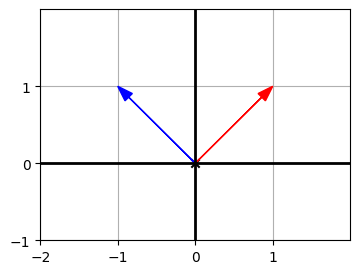

笛卡尔坐标1 (1, 1) 转换为极坐标为：(1.4142135623730951, 45.0)
笛卡尔坐标2 (-1, 1) 转换为极坐标为：(1.4142135623730951, 135.0)


In [22]:
origin_point1 = (1, 1)
print(f'计算角度1：{math.atan(origin_point1[1] / origin_point1[0])}')
print(f'计算角度1：{to_degrees(math.atan(origin_point1[1] / origin_point1[0]))}')
origin_point2 = (-1, 1)
print(f'计算角度2：{math.atan(origin_point2[1] / origin_point2[0])}')
print(f'计算角度2：{to_degrees(math.atan(origin_point2[1] / origin_point2[0]))}')

draw(
    Arrow(origin_point1, (0, 0), color='red'),
    Arrow(origin_point2, (0, 0), color='blue'),
)

print(f'笛卡尔坐标1 {origin_point1} 转换为极坐标为：{
math.sqrt(origin_point1[0] ** 2 + origin_point1[1] ** 2),
to_degrees(math.atan2(origin_point1[1], origin_point1[0]))
}')
print(f'笛卡尔坐标2 {origin_point2} 转换为极坐标为：{
math.sqrt(origin_point2[0] ** 2 + origin_point2[1] ** 2),
to_degrees(math.atan2(origin_point2[1], origin_point2[0]))
}')

笛卡尔坐标转极坐标的公式如下：

$$
(r, \theta) = (\sqrt{x^2 + y^2}, \arctan(\frac{y}{x}))
$$

In [23]:
def cartesian_to_polar(p):
    x, y = p
    return math.sqrt(x ** 2 + y ** 2), math.atan2(y, x)


def cartesian_to_polar_degrees(p):
    x, y = p
    return math.sqrt(x ** 2 + y ** 2), to_degrees(math.atan2(y, x))

In [24]:
origin_point1 = (1, 1)
origin_point2 = (-1, 1)

print(f'笛卡尔坐标1 {origin_point1} 转换为极坐标为：{cartesian_to_polar_degrees(origin_point1)}')
print(f'笛卡尔坐标2 {origin_point2} 转换为极坐标为：{cartesian_to_polar_degrees(origin_point2)}')

笛卡尔坐标1 (1, 1) 转换为极坐标为：(1.4142135623730951, 45.0)
笛卡尔坐标2 (-1, 1) 转换为极坐标为：(1.4142135623730951, 135.0)
